# Isling Model

In [ ]:
from ising import Ising
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [ ]:
# Initialise Variables
L, B, J, beta = 100, -0.05, 0.5, 1

num_therm = 100

mag_per_spin_arr = np.zeros(num_therm)

visual_arr = []

# Initialise the Ising Model with the Constants

In [ ]:
ising = Ising(L,J,B, beta)


In [ ]:
def calculate_running_average(arr, n):
    return np.convolve(arr, np.ones((n))/n, mode='valid')

def flatten_point(running_avg, threshold):
    diff = np.diff(running_avg)
    flatten_point = np.where(np.abs(diff) < threshold)[0]
    if flatten_point.size > 0:
        return flatten_point[0]
    else:
        return len(running_avg)



rav = calculate_running_average(mag_per_spin_arr, 5)
threshold = 0.001
fp = flatten_point(rav, threshold)

In [ ]:
from joblib import Parallel, delayed

j_vals = np.linspace(0.3,0.6,120)

avg_mag_bzero = np.zeros(len(j_vals))

avg_mag_err_bzero = np.zeros(len(j_vals))

def compute_avg_mags_bzero(i, j):
    ising = Ising(100,j,0, 1)
    mag_per_spin_arr = np.array([ising.do_thermalisation_sweep() or ising.get_mag_per_spin() for _ in range(1000)])
    rav = calculate_running_average(mag_per_spin_arr, 5)
    fp = flatten_point(rav, 0.001)
    avg_mag = np.mean(mag_per_spin_arr[-100:])
    avg_mag_err = np.std(mag_per_spin_arr[-100:])/np.sqrt(len(mag_per_spin_arr[-100:]))
    print(i)
    return i, avg_mag, avg_mag_err

results = Parallel(n_jobs=-1)(delayed(compute_avg_mags_bzero)(i, j) for i, j in enumerate(j_vals))

for i, avg_mag, avg_mag_err in results:
    avg_mag_bzero[i] = avg_mag
    avg_mag_err_bzero[i] = avg_mag_err
    

In [ ]:
#np.save('avg_mag_bzero.npy', avg_mag_bzero), np.save('avg_mag_err_bzero.npy', avg_mag_err_bzero)

avg_mag_bzero = np.load('avg_mag_bzero.npy')
avg_mag_err_bzero = np.load('avg_mag_err_bzero.npy')

plt.errorbar(j_vals, np.abs(avg_mag_bzero), yerr=avg_mag_err_bzero*5, fmt='x', color='red', label='B=0')
plt.xlabel('J')
plt.ylabel('Average Magnetisation')
plt.show()

second_expression:  [-0.71644732 -0.69684729 -0.67745754 -0.65827615 -0.63930123 -0.62053086
 -0.60196317 -0.58359628 -0.56542831 -0.5474574  -0.5296817  -0.51209938
 -0.49470859 -0.47750752 -0.46049435 -0.44366728 -0.42702453 -0.41056432
 -0.39428487 -0.37818443 -0.36226125 -0.3465136  -0.33093975 -0.31553799
 -0.30030662 -0.28524395 -0.2703483  -0.25561801 -0.24105141 -0.22664688
 -0.21240278 -0.19831748 -0.18438939 -0.1706169  -0.15699845 -0.14353244
 -0.13021734 -0.11705158 -0.10403364 -0.09116199 -0.07843513 -0.06585155
 -0.05340978 -0.04110833 -0.02894575 -0.01692058 -0.00503139  0.00672324
  0.01834473  0.02983448  0.04119389  0.05242431  0.06352713  0.07450369
  0.08535534  0.09608341  0.1066892   0.11717403  0.1275392   0.13778598
  0.14791564  0.15792945  0.16782866  0.17761449  0.18728817  0.19685092
  0.20630394  0.21564842  0.22488553  0.23401646  0.24304235  0.25196435
  0.26078359  0.26950121  0.27811831  0.286636    0.29505536  0.30337749
  0.31160345  0.31973431  0.327

/var/folders/qg/mvtg97v55wb87jygkwnz2fdr0000gn/T/ipykernel_20929/2733157538.py:11: RuntimeWarning: invalid value encountered in power
  second = np.power(second_expression,0.125)


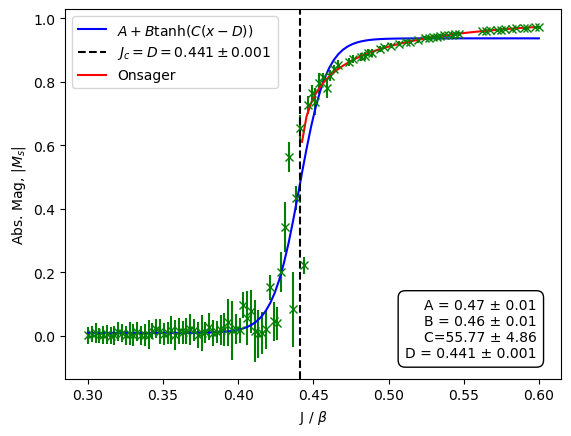

[(0.008695244053937234, 0.3), (0.00869528937719466, 0.3025210084033613), (0.008695349416785236, 0.30504201680672266), (0.008695428951057904, 0.307563025210084), (0.008695534309874409, 0.3100840336134454), (0.008695673878379162, 0.3126050420168067), (0.00869585876433826, 0.31512605042016806), (0.008696103682158729, 0.3176470588235294), (0.008696428123939337, 0.32016806722689073), (0.008696857910746425, 0.32268907563025206), (0.008697427247563894, 0.32521008403361346), (0.008698181445443265, 0.3277310924369748), (0.008699180527463823, 0.3302521008403361), (0.008700504005425436, 0.33277310924369746), (0.008702257207321096, 0.3352941176470588), (0.008704579658974587, 0.33781512605042013), (0.008707656186561386, 0.3403361344537815), (0.00871173162301242, 0.34285714285714286), (0.008717130287664576, 0.3453781512605042), (0.00872428178759127, 0.34789915966386553), (0.008733755190752535, 0.35042016806722687), (0.008746304284888873, 0.3529411764705882), (0.008762927513985719, 0.3554621848739495

In [73]:
# Create a new subplot for the intersection
fig2, ax2 = plt.subplots()

def z(x):
    return np.exp(-2*x)

def onsager(x):
    first = np.power(1 + np.power(z(x),2),0.25)
    second_expression = 1 - (6 * np.power(z(x),2)) + (np.power(z(x),4))
    print("second_expression: ", second_expression)
    second = np.power(second_expression,0.125)
    third = np.power(1 - np.power(z(x),2),0.5)
    val = np.abs(first * second / third )
    print("first: ", first)
    print("second: ", second)
    print("third: ", third)
    return val
# Extract the values for b = 0

def tanh(x,a ,b, c, d):
    return a + b * np.tanh(c * (x - d))

from scipy.optimize import curve_fit



mask1 = j_vals <= 0.46
mask2 = (j_vals > 0.46) & (np.abs(avg_mag_bzero) >= 0.75)
mask = mask1 | mask2

# Apply the masks to the data
j_vals_filtered = j_vals[mask]
avg_mag_bzero_filtered = np.abs(avg_mag_bzero)[mask]
avg_mag_err_bzero_filtered = avg_mag_err_bzero[mask]
# Plot the original data
ax2.errorbar(j_vals_filtered, np.abs(avg_mag_bzero_filtered), yerr=avg_mag_err_bzero_filtered*10, fmt='x', color='green')

# Fit the data
p0 = [0, 0.5, 0,0]
popt, pcov = curve_fit(tanh, j_vals_filtered, np.abs(avg_mag_bzero_filtered), p0)
# Plot the fitted curve
j_vals_fit = np.linspace(j_vals.min(), j_vals.max(), 100)
perr = np.sqrt(np.diag(pcov))

ax2.plot(j_vals_fit, tanh(j_vals_fit, *popt), 'b-', label=r'$A + B \tanh(C (x - D))$')
ax2.axvline(x=0.441, linestyle='--', color='black', label=r'$J_c = D = 0.441 \pm 0.001$ ')
ax2.plot(j_vals_fit, onsager(j_vals_fit), 'r-', label='Onsager')
# Set labels and limits
ax2.set_xlabel(r'J / $\beta$')
# ax2.set_xlim(0.25,1)
ax2.set_ylabel(r'Abs. Mag, $|M_s|$')
# Calculate the errors

# Add the errors to the text
ax2.text(0.95, 0.05, f'A = {popt[0]:.2f} ± {perr[0]:.2f}\nB = {popt[1]:.2f} ± {perr[1]:.2f}\nC={popt[2]:.2f} ± {perr[2]:.2f}\nD = {popt[3]:.3f} ± {perr[3]:.3f}',
         transform=ax2.transAxes, horizontalalignment='right', verticalalignment='bottom',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.legend()

# Show the plot
plt.savefig('mag_vs_j.svg')
plt.show()
print(list(zip(tanh(j_vals, *popt), j_vals)))

print()